<font color='lime'>

# Model training and parameter selection with Grid Search

</font> 

<font color='yellow'>

## K-nearest neighbors (KNN)

</font> 

<font color='orange'>

### Load the dataset

</font> 

In [28]:
import pandas as pd

file_path = 'data/spotify_songs_with_mood.csv'
spotify_data = pd.read_csv(file_path)

<font color='orange'>

### Separate to training and test subset

</font> 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting the features and the target
features = spotify_data[['danceability', 'energy', 'valence', 'acousticness']]
target = spotify_data['mood']

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Checking the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20222, 4), (8667, 4), (20222,), (8667,))

<font color='orange'>

### Run algorithm

</font> 

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Defining the KNN classifier and the grid search parameters
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(1, 31, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fitting the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 31, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

<font color='orange'>

### Save model

</font> 

In [31]:
import joblib

# Save the best KNN model from grid search
best_knn_model = grid_search.best_estimator_
model_path = 'model/songs_mood_knn_model.joblib'
joblib.dump(best_knn_model, model_path)

# Return the path for confirmation
model_path

'model/songs_mood_knn_model.joblib'

<font color='orange'>

### Testing subset usage

</font> 

In [32]:
from sklearn.metrics import accuracy_score

# Making predictions on the test set
y_pred = best_knn_model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

# Return the accuracy as a percentage
accuracy_percentage

97.8308526595131

<font color='yellow'>

## Model estimation

</font> 

<font color='orange'>

### A. Visualization of predicted values

</font> 

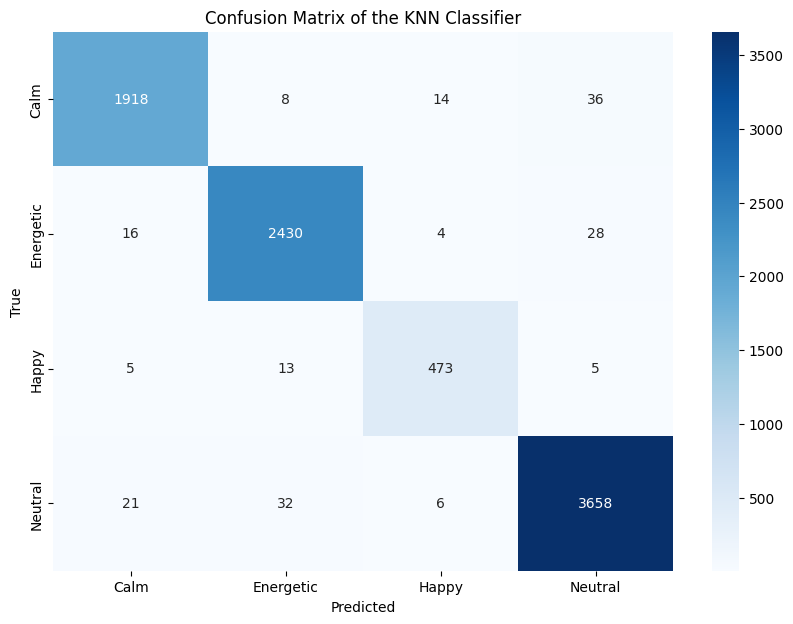

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=best_knn_model.classes_, yticklabels=best_knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of the KNN Classifier')
plt.show()

<font color='orange'>

### B. Prediction quality assessment (precision/recall/f1-score/ROC-AUC)

</font> 